In [13]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:


all_path_similarities = pd.read_csv('similarities.csv')
all_path_similarities['last_article'] = all_path_similarities['path'].apply(lambda x: eval(x)[0][-1])
all_path_similarities_unfinished = all_path_similarities[all_path_similarities['last_article'] != all_path_similarities['target']]
all_path_similarities_finished = all_path_similarities[all_path_similarities['last_article'] == all_path_similarities['target']]
all_path_similarities_finished.head()

OpenAI               target  \
0  [[0.27250955391064935, 0.2070933106970122, 0.3...  African slave trade   
1  [[0.27250955391064935, 0.214902261382967, 0.22...  African slave trade   
2  [[0.16587847219917598, 0.2303523759254455, 0.6...               Greece   
3  [[0.08519395595681435, 0.09169799390481226, 0....      John F. Kennedy   
4  [[0.08519395595681435, 0.10066178434998091, 0....      John F. Kennedy   

                                                path         last_article  
0  [['14th century', 'Europe', 'Africa', 'Atlanti...  African slave trade  
1  [['14th century', 'Niger', 'Nigeria', 'British...  African slave trade  
2  [['14th century', 'Renaissance', 'Ancient Gree...               Greece  
3  [['14th century', 'Italy', 'Roman Catholic Chu...      John F. Kennedy  
4  [['14th century', 'Europe', 'North America', '...      John F. Kennedy

In [16]:
# Take only the last 10 elements of each path
def shorten_list(x,n=10):
    x = eval(x.replace(" ", ""))  # Convert string representation of list to actual list
    x=x[0] #unpack the list
    if len(x) > n:
        return x[-n:]
    return x

def handle_unfinished(x,n=9):
    x = eval(x.replace(" ", ""))  # Convert string representation of list to actual list
    x = x[0] #unpack the list
    max_value = max(x)
    if max_value < 0.3:
        return []
    max_index = x.index(max_value)
    x = x[:max_index + 1]  # Keep only values up to and including max
    if len(x) > n:
        return x[-n:]
    return x

all_path_similarities_unfinished_copy = all_path_similarities_unfinished.copy()
all_path_similarities_unfinished_copy['OpenAI'] = all_path_similarities_unfinished_copy['OpenAI'].apply(handle_unfinished)
similarities_unfinished = all_path_similarities_unfinished_copy['OpenAI'][all_path_similarities_unfinished_copy['OpenAI'].apply(lambda x: len(x) > 0)]

all_path_similarities_finished_copy = all_path_similarities_finished.copy()
all_path_similarities_finished_copy['OpenAI'] = all_path_similarities_finished_copy['OpenAI'].apply(shorten_list)
similarities_finished = all_path_similarities_finished_copy['OpenAI']

print(len(similarities_unfinished))



9641


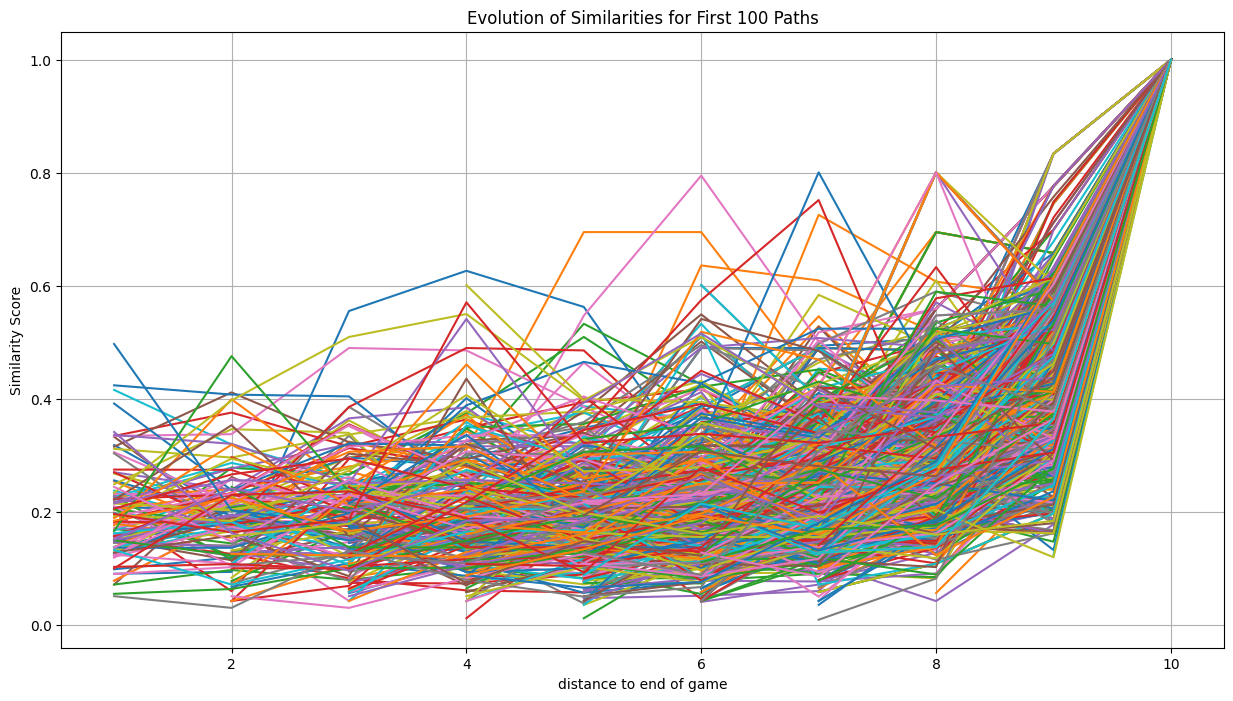

In [17]:
# Create figure and axis
plt.figure(figsize=(15, 8))
n=10

# Plot first 100 similarity evolutions
for i in range(1000):
    similarities = all_path_similarities_finished_copy['OpenAI'].iloc[i]
    reversed_similarities = similarities[::-1]
    indexes = range(n,n-len(reversed_similarities),-1)
    plt.plot(indexes, reversed_similarities)


plt.xlabel('distance to end of game')
plt.ylabel('Similarity Score') 
plt.title('Evolution of Similarities for First 100 Paths')

# Add grid for better readability
plt.grid(True)

plt.show()


In [18]:
from tqdm import tqdm

distance_to_series_finished ={}
for i in tqdm(range(len(similarities_finished))):
    similarities = similarities_finished.iloc[i]
    reversed_similarities = similarities[::-1]
    for j in range(len(reversed_similarities)):
        distance_to_series_finished[j] = distance_to_series_finished.get(j,[]) + [reversed_similarities[j]]

print(len(distance_to_series_finished))

distance_to_series_unfinished ={}
for i in tqdm(range(len(similarities_unfinished))):
    similarities = similarities_unfinished.iloc[i]
    reversed_similarities = similarities[::-1]
    for j in range(len(reversed_similarities)):
        distance_to_series_unfinished[j] = distance_to_series_unfinished.get(j,[]) + [reversed_similarities[j]]

print(distance_to_series_unfinished)


100%|██████████| 51318/51318 [00:18<00:00, 2735.63it/s] 


10


100%|██████████| 9641/9641 [00:00<00:00, 23226.00it/s]

{0: [0.43957460094280554, 0.5909848752213069, 0.4739430221231442, 0.3831635996765537, 0.38060468501842726, 0.530422145783612, 0.30464509024045566, 0.3781373771993638, 0.3371723138052344, 0.31979338034096555, 0.4358123196013387, 0.4048372176795637, 0.4895469301976203, 0.3096010312980664, 0.5220134641040103, 0.44471689945521464, 0.414964643242157, 0.43902032833756016, 0.3277967531690501, 0.420861136157171, 0.493288219208584, 0.49523929607854805, 0.5510885854500516, 0.5240130579660438, 0.6147852287458376, 0.33988506761621934, 0.5165163124138697, 0.30470998936811633, 0.32974967776472197, 0.4174932240026205, 0.39700363510632275, 0.5515611651452024, 0.40894481786837145, 0.4119826906334386, 0.3076700511613252, 0.32393368803896094, 0.3126250388569869, 0.5174034114169418, 0.30179274264357997, 0.4165138996658368, 0.5161464498329903, 0.30552835865178807, 0.3390386121358025, 0.5597353336241507, 0.5581259588228857, 0.41679302680270064, 0.5425726563580335, 0.505468128357427, 0.7609963885702924, 0.60

In [20]:
l_finished=[]
for i in range(len(distance_to_series_finished)):
    l_finished.append(distance_to_series_finished[i])

l_unfinished=[]
for i in range(len(distance_to_series_unfinished)):
    l_unfinished.append(distance_to_series_unfinished[i])

print(l_finished)
print(l_unfinished)

[[1.0, 1.0, 0.9999999999999998, 1.0000000000000002, 1.0000000000000002, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0, 1.0, 1.0, 1.0, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0000000000000002, 1.0, 1.0000000000000002, 1.0000000000000002, 1.0, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0000000000000002, 1.0, 0.9999999999999999, 1.0, 0.9999999999999998, 1.0000000000000002, 1.0, 1.0, 1.0, 1.0, 1.0000000000000002, 1.0000000000000002, 1.0, 1.0, 1.0, 1.0, 0.9999999999999998, 0.9999999999999998, 0.9999999999999998, 1.0, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.00000000000

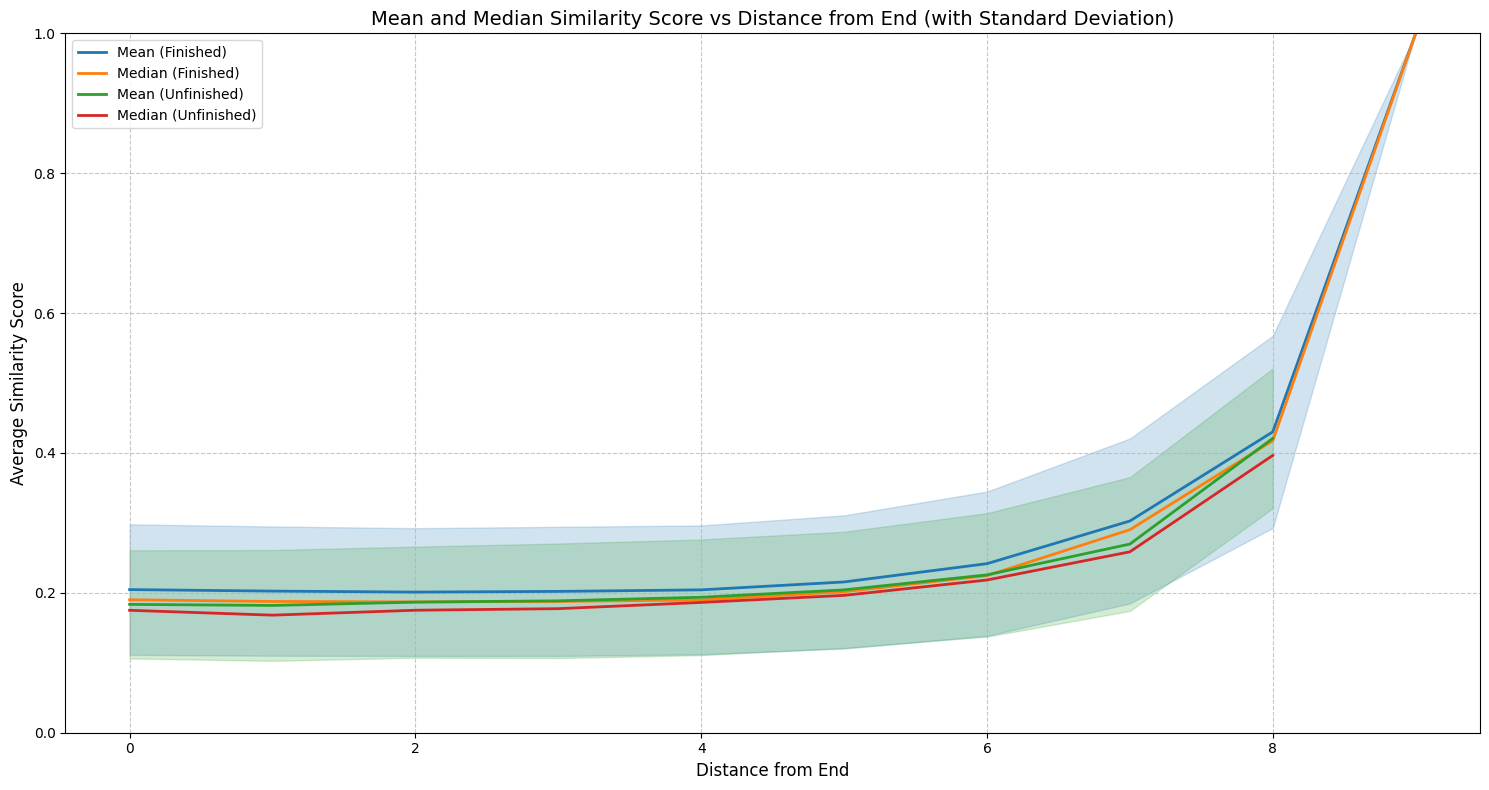

In [29]:
# Calculate means and standard deviations
means_finished = [np.mean(sublist) for sublist in l_finished]
medians_finished = [np.median(sublist) for sublist in l_finished]
stds_finished = [np.std(sublist) for sublist in l_finished]

means_unfinished = [np.mean(sublist) for sublist in l_unfinished]
medians_unfinished = [np.median(sublist) for sublist in l_unfinished]
stds_unfinished = [np.std(sublist) for sublist in l_unfinished]


# Create x-axis values (distances)
x_finished = range(len(means_finished)-1, -1, -1)  # Reversed range
x_unfinished = range(len(means_unfinished)-1, -1, -1)  # Reversed range

# Create figure and axis
plt.figure(figsize=(15, 8))

# Plot means with standard deviation areas
plt.plot(x_finished, means_finished, color='#1f77b4', label='Mean (Finished)', linewidth=2)
plt.plot(x_finished, medians_finished, color='#ff7f0e', label='Median (Finished)', linewidth=2)
plt.fill_between(x_finished, 
                 [m - s for m,s in zip(means_finished, stds_finished)],
                 [m + s for m,s in zip(means_finished, stds_finished)],
                 color='#1f77b4', alpha=0.2)

plt.plot(x_unfinished, means_unfinished, color='#2ca02c', label='Mean (Unfinished)', linewidth=2)
plt.plot(x_unfinished, medians_unfinished, color='#d62728', label='Median (Unfinished)', linewidth=2)
plt.fill_between(x_unfinished, 
                 [m - s for m,s in zip(means_unfinished, stds_unfinished)],
                 [m + s for m,s in zip(means_unfinished, stds_unfinished)],
                 color='#2ca02c', alpha=0.2)

plt.xlabel('Distance from End', fontsize=12)
plt.ylabel('Average Similarity Score', fontsize=12)
plt.ylim(0,1)

plt.title('Mean and Median Similarity Score vs Distance from End (with Standard Deviation)', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend(fontsize=10)


plt.tight_layout()
plt.show()
